In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score


# features = pd.get_dummies(features)


In [59]:
# load admissions data
dataset= pd.read_csv('Admission_Predict.csv')

In [60]:
#drop the index column(Serial No.)
dataset.drop(columns='Serial No.', inplace= True)
# mark features
features = dataset.iloc[:, 0:-1]
# mark labels
labels= dataset.iloc[:,-1]
#split our training and test set
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2, random_state= 42)

In [61]:
# standardizing our data by scaling it
sc = StandardScaler()
features_train_scaled = sc.fit_transform(features_train)
features_test_scaled = sc.transform(features_test)

In [62]:
# function to design the model
def design_model(feature_data):
    model = Sequential()
    #input layer
    input_shape= feature_data.shape[1]
    input = InputLayer(input_shape = input_shape)
    model.add(input)
    
    # this model has two hidden layers and two dropout layers
	# relu activation function is used at both hidden layers
    hiden_layer_1 = Dense(32, activation = 'relu')
    hiden_layer_2 = Dense(16, activation = 'relu')
    
    model.add(hiden_layer_1)
    model.add(Dropout(0.1))
    model.add(hiden_layer_2)
    model.add(Dropout(0.2))
    
    #output layer
    model.add(Dense(1))
    
    # using an adam optimizer with a learning rate of 0.05
	# using mean-squared error as our loss function and mean average error as our metric
    opt = Adam(learning_rate= 0.05)
    model.compile(loss= 'mse', metrics= 'mae', optimizer= opt)
    
    return model
    

In [72]:
# early stopping for efficiency
es = EarlyStopping(monitor= 'val_loss', mode= 'min', verbose=1, patience= 50)
# apply the model to the scaled training data
model = design_model(features_train_scaled)
# fit the model with 100 epochs and a batch size of 8
# validation split at 0.1
history = model.fit(features_train_scaled, labels_train, epochs= 100, batch_size= 8, verbose= 1, validation_split=0.1 , callbacks=[es])
# evaluate the model
val_mse, val_mae = model.evaluate(features_test_scaled, labels_test, verbose= 0)
# view the MAE performance
print('MAE= ', val_mae)

Epoch 1/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0954 - mae: 0.2050 - val_loss: 0.0092 - val_mae: 0.0777
Epoch 2/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0115 - mae: 0.0828 - val_loss: 0.0114 - val_mae: 0.0904
Epoch 3/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0094 - mae: 0.0743 - val_loss: 0.0051 - val_mae: 0.0460
Epoch 4/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0100 - mae: 0.0788 - val_loss: 0.0060 - val_mae: 0.0517
Epoch 5/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0091 - mae: 0.0763 - val_loss: 0.0080 - val_mae: 0.0719
Epoch 6/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0100 - mae: 0.0782 - val_loss: 0.0060 - val_mae: 0.0535
Epoch 7/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0081 - mae: 0.0695 - val_loss: 0.0089 - val_mae: 0.0786
Epoch 8/100
36/36 [==============================] - 0s 1ms/step - loss: 0.0089 - m

In [76]:
# evauate r-squared score
labels_pred = model.predict(features_test_scaled)
print(r2_score(labels_test,labels_pred))

3/3 [==============================] - 0s 996us/step
0.43386947383960384


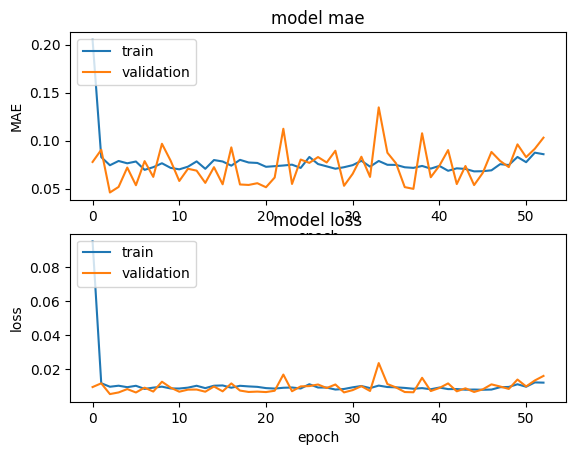

In [77]:
# plot MAE and val_MAE over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')

# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()

In [48]:
history.history

{'loss': [0.17723222076892853,
  0.013435476459562778,
  0.021128907799720764,
  0.012335301376879215,
  0.011481800116598606,
  0.01027478277683258,
  0.011557592079043388,
  0.010410555638372898,
  0.009974886663258076,
  0.010339929722249508,
  0.010167759843170643,
  0.010718543082475662,
  0.010939282365143299,
  0.009750391356647015,
  0.010627822950482368,
  0.010889489203691483,
  0.011179003864526749,
  0.009285359643399715,
  0.010779443196952343,
  0.009674513712525368,
  0.010892818681895733,
  0.010954858735203743,
  0.012821095995604992,
  0.011811438016593456,
  0.008885214105248451,
  0.009878584183752537,
  0.008453551679849625,
  0.009815468452870846,
  0.008777335286140442,
  0.00893740076571703,
  0.009487875737249851,
  0.010222687385976315,
  0.008906465955078602,
  0.011233329772949219,
  0.009949315339326859,
  0.01071842759847641,
  0.010013947263360023,
  0.009502618573606014,
  0.008955161087214947,
  0.008499798364937305,
  0.00852954387664795,
  0.007930038